In [1]:
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
# Model-specific imports:
from sklearn import linear_model

In [3]:
inputData = pd.read_excel(r'/Users/harshilkalsi/Downloads/Volumetric_features.xlsx', engine='openpyxl').sample(frac = 1)

inputData.head()

,S.No,Left-Lateral-Ventricle,Left-Inf-Lat-Vent,Left-Cerebellum-White-Matter,Left-Cerebellum-Cortex,Left-Thalamus,Left-Caudate,Left-Putamen,Left-Pallidum,3rd-Ventricle,...,rh_supramarginal_thickness,rh_frontalpole_thickness,rh_temporalpole_thickness,rh_transversetemporal_thickness,rh_insula_thickness,rh_MeanThickness_thickness,BrainSegVolNotVent.2,eTIV.1,Age,dataset
3347,3348,4563.6,85.9,18344.4,60029.4,8579.0,3328.3,5044.7,2045.0,883.1,...,2.591,2.916,3.589,2.341,2.996,2.50115,1223302,1535225.730,26,8
3455,3456,9098.3,243.2,13702.6,51308.5,7777.9,3489.1,5441.6,2309.8,986.8,...,2.401,2.917,3.753,2.277,2.711,2.39595,1130478,1407028.157,49,8
1366,1367,4906.9,344.5,14758.9,52976.4,6746.6,2815.0,3964.2,1601.5,1070.2,...,2.401,2.836,3.599,2.383,2.770,2.35426,990487,1384497.795,57,2
2688,2689,7584.5,282.4,11524.5,45857.8,6546.7,3421.6,4733.2,1675.3,1103.8,...,2.375,3.007,3.626,2.423,2.872,2.35090,905557,1132268.024,71,7
864,865,9390.5,413.4,14387.1,47349.5,6215.9,2812.3,3866.3,1772.1,1317.2,...,2.252,2.269,3.506,2.516,2.720,2.23435,964469,1377483.108,71,1


In [4]:
# # select the input brain volume vector (X) and the output age vector (y)
X = inputData.drop(columns=['S.No', 'Age', 'dataset'])
y = inputData['Age']

# split the X and y vectors into training and testing dataset
# we're using 80% for training and 20% for testing, but this can change
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=13)

In [5]:
# instantiate a linear regression model using sklearn:
reg = linear_model.LinearRegression(fit_intercept=False)

# fit the model to the training data
reg.fit(X_train, y_train)

LinearRegression(fit_intercept=False)

In [6]:
# check the model's performance on unseen, test data
predictions = reg.predict(X_test)


# compare the predictions to the known values (y_test)
print('r square value:', metrics.r2_score(y_test, predictions))
print('mean absolute error (years):', metrics.mean_absolute_error(y_test, predictions))
print('mean square error:', metrics.mean_squared_error(y_test, predictions))
print('root mean absolute error (years):', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

r square value: 0.8363420985882789
mean absolute error (years): 6.373706804793946
mean square error: 63.10462967342164
root mean absolute error (years): 7.943842248774937


/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

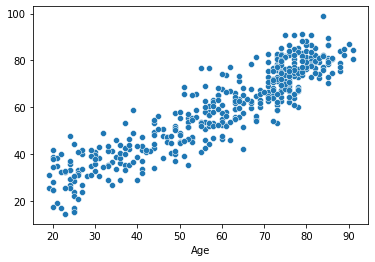

In [7]:
# plotting
import seaborn as sns
sns.scatterplot(y_test, predictions)

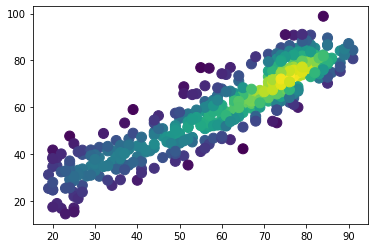

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Calculate the point density
xy = np.vstack([y_test,predictions])
z = gaussian_kde(xy)(xy)

fig,ax = plt.subplots()
ax.scatter(y_test, predictions, c=z, s=100)
plt.show()